<a href="https://colab.research.google.com/github/divyaparadkar/DeepLearning_Traning/blob/main/Assigment_Training_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [6]:
data=pd.read_csv("insurance_data.csv")

In [9]:
data

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [11]:
data.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [10]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [12]:
X

,age,affordibility
0,22,1
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,0
8,62,1
9,61,1


In [ ]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
27    0
Name: bought_insurance, dtype: int64

In [ ]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)
print(X_train)
X_train.shape

    age  affordibility
22   40              1
11   28              1
13   29              0
15   55              1
1    25              0
4    46              1
5    56              1
2    47              1
16   25              0
23   45              1
3    52              0
26   23              1
24   50              1
18   19              0
27   46              1
20   21              1
7    60              0
10   18              1
14   49              1
19   18              1
6    55              0


(21, 2)

In [ ]:
print(type(X_test))
X_test.shape

<class 'pandas.core.frame.DataFrame'>


(7, 2)

In [ ]:
print(type(y_train))
X_train.shape

<class 'pandas.core.series.Series'>


(21, 2)

In [ ]:
print(type(y_train))
y_test.shape

<class 'pandas.core.series.Series'>


(7,)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10,input_shape=(2,),activation="relu"),
    keras.layers.Dense(100,input_shape=(2,),activation="relu"),
    keras.layers.Dense(10,input_shape=(2,),activation="relu")])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 948ms/step - loss: 9.8070 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 9.5602 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 9.4963 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 9.4977 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 9.5005 - accuracy: 0.0000e+00


In [ ]:
model2=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(2,activation="relu"),
    keras.layers.Dense(2,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid")])

model2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model2.fit(X_train,y_train,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 756ms/step - loss: 5.1693 - accuracy: 0.4762
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 5.1290 - accuracy: 0.4762
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 5.0888 - accuracy: 0.4762
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 5.0487 - accuracy: 0.4762
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 5.0087 - accuracy: 0.4762


In [ ]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 180ms/step - loss: 3.3644 - accuracy: 0.5714


[3.3643860816955566, 0.5714285969734192]

In [ ]:
y_test_pre=model2.predict(X_test)

1/1 [==============================] - 0s 136ms/step


In [ ]:
y_test_pre.shape

(7, 2)

In [ ]:
y_test_pre[5]

array([0.03404196, 0.9948908 ], dtype=float32)

In [ ]:
y_test_label=[np.argmax(i) for i in y_test_pre]
y_test_label=np.array(y_test_label)


In [ ]:
y_test_label.shape

(7,)

In [ ]:
df=[]
for i in y_test_pre:
  x=(np.argmax(i))
  df.append(x)

In [ ]:
y_pre=np.array(df)

In [ ]:
y_pre

array([1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pre.shape

(7,)

In [ ]:
y_test_pre[5]

array([0.03404196, 0.9948908 ], dtype=float32)

In [ ]:
np.argmax(y_test_pre[5])

1

In [ ]:
cm=tf.math.confusion_matrix(y_test,y_test_label)
type(cm)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
y_test_label.shape

(7,)

<Axes: >

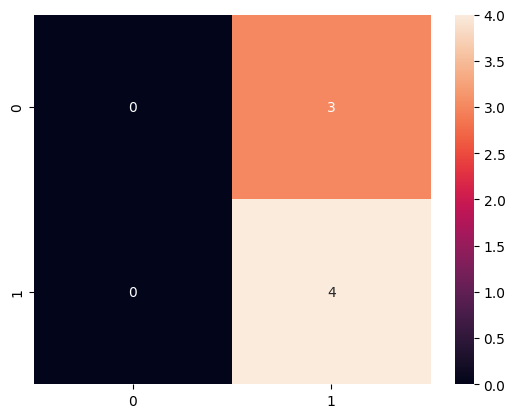

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
# prompt: model.getweights

model2.get_weights()


[array([[ 0.66985416,  0.18251966],
        [-0.61450094,  0.6506714 ]], dtype=float32),
 array([-0.00499798,  0.0050054 ], dtype=float32),
 array([[-0.7763266 ,  0.320747  ],
        [-0.9380379 , -0.06902727]], dtype=float32),
 array([ 0.        , -0.00499937], dtype=float32),
 array([[-1.1734267 ,  0.35819674],
        [-0.614332  ,  0.96748406]], dtype=float32),
 array([ 0.00499992, -0.00499992], dtype=float32)]

Bengaluru_house_predection

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df=pd.read_csv("bengaluru_house_prices.csv")

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
X

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0


In [ ]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

In [ ]:
print(data.describe())

               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [ ]:
print(df.groupby('bath').size())

bath
1.0      788
2.0     6908
3.0     3286
4.0     1226
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
dtype: int64


In [ ]:
data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df['society'].fillna("Info Not avalable",inplace= True)

In [ ]:
df[df.location.isna()] # location column

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [ ]:
#loocking for the same society
df[df.society=='Grare.S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [ ]:
# Size Column
df[df['size'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,Info Not avalable,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,Info Not avalable,5000,NaN,NaN,400.000


In [ ]:
df[df.society=='Orana N']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.0


In [ ]:
data.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Info Not avalable,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Info Not avalable,1200,2.0,1.0,51.00


In [ ]:
df['balcony']=df['balcony'].fillna(df['balcony'].mean())
df['bath']=df['bath'].fillna(df['bath'].mean())
df

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

## NEW DATA SET WESTON HEALTHCARE

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
data =pd.read_csv("/content/watson_healthcare_modified.csv")

In [ ]:
data


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [ ]:
data.head

<bound method NDFrame.head of       EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0        1313919   41        No      Travel_Rarely       1102  Cardiology   
1        1200302   49        No  Travel_Frequently        279   Maternity   
2        1060315   37       Yes      Travel_Rarely       1373   Maternity   
3        1272912   33        No  Travel_Frequently       1392   Maternity   
4        1414939   27        No      Travel_Rarely        591   Maternity   
...          ...  ...       ...                ...        ...         ...   
1671     1117656   26       Yes      Travel_Rarely        471   Neurology   
1672     1152327   46        No      Travel_Rarely       1125  Cardiology   
1673     1812428   20        No      Travel_Rarely        959   Maternity   
1674     1812429   39        No      Travel_Rarely        466   Neurology   
1675     1152329   27        No      Travel_Rarely        511  Cardiology   

      DistanceFromHome  Education    Educatio

In [ ]:
data.shape

(1676, 35)

In [ ]:
data.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

In [ ]:
data.Age.values


array([41, 49, 37, ..., 20, 39, 27])

In [ ]:
data.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [ ]:
# prompt: how to se the sahpe of overTime

data.EmployeeCount.shape


(1676,)

In [ ]:
data1=data[churn_data["TotalCharges"]!=" "]